In [241]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [242]:
sns.set(font_scale = 2,style ='whitegrid', rc={'figure.figsize':(20,7)})
#The code uses the seaborn library to set the font size, plot style, and figure size

Uploading the necessary files

In [243]:
url_1 = "https://raw.githubusercontent.com/snakeway8/tools-for-analyzing/main/avocado_full.csv"

In [244]:
avocado_full = pd.read_csv(url_1)

In [245]:
url_2 ="https://raw.githubusercontent.com/snakeway8/tools-for-analyzing/main/avocado_mean.csv"

In [246]:
avocado_mean = pd.read_csv(url_2,index_col=0,parse_dates=['Date'])

In [247]:
url_3 = "https://raw.githubusercontent.com/snakeway8/tools-for-analyzing/main/delays.csv"

In [261]:
df =  pd.read_csv(url_3)

In [262]:
df

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


Task 1
Calculate the moving average of the avocado price (AveragePrice) with a window size of 3. What is the maximum value? 
Round your answer to 2 decimal places.

In [249]:
avocado_mean.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [250]:
result = avocado_mean.groupby('Date').agg({'AveragePrice':'mean'}).rolling(3).mean().max().round(2)

In [251]:
result 

AveragePrice    1.85
dtype: float64

Task2
Your task is to plot moving average graphs with different window parameter values (2, 4, 10, 50) and observe how the graph changes depending on the selected window size.

In [252]:
avocado_mean.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [253]:
avo_mean_2 = avocado_mean.rolling(2).mean()
avo_mean_4 = avocado_mean.rolling(4).mean()
avo_mean_10 = avocado_mean.rolling(10).mean()
avo_mean_50 = avocado_mean.rolling(50).mean()

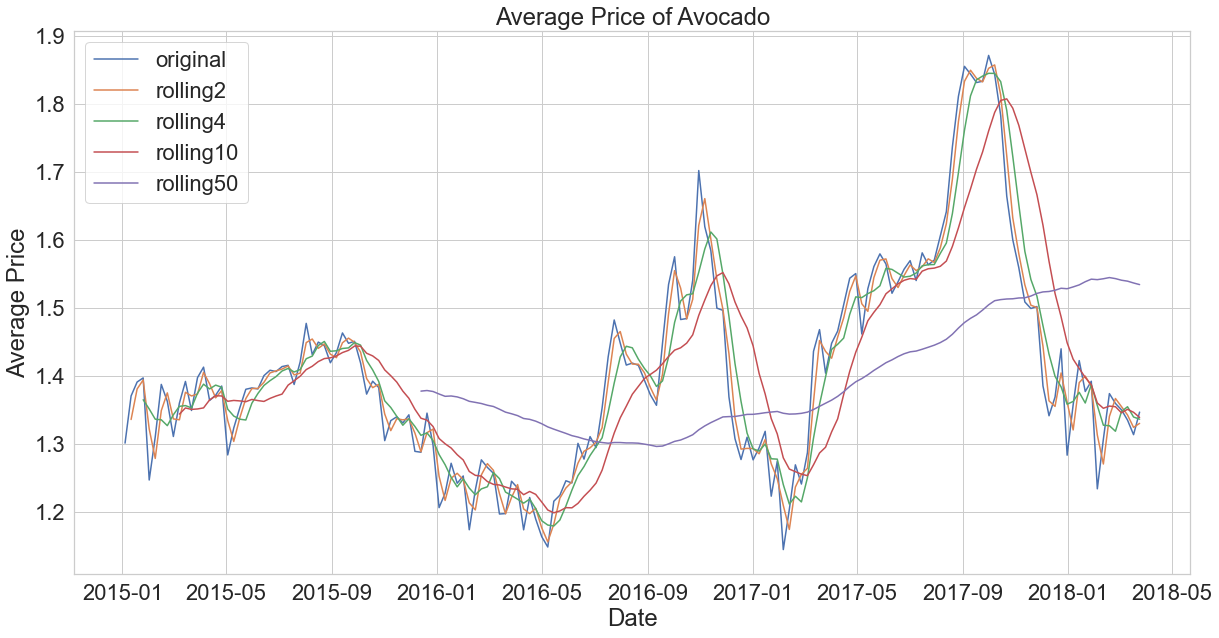

In [254]:
fig, ax = plt.subplots(figsize=(20, 10))
windows = [2,4,10,50]
sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice,  label = 'original')

for window in windows:
    df = avocado_mean.rolling(window).mean()
    sns.lineplot(x=df.index, y=df.AveragePrice,  label = f'rolling{window}')
ax.set_title('Average Price of Avocado')
ax.set_xlabel('Date')
ax.set_ylabel('Average Price')
plt.legend()
   

We can see that when increasing the value of the moving window on the moving average graph, one can observe a smoothing of fluctuations and a smoother movement of the curve.Applying the moving average method reduces noise and fluctuations on the graph, making it more readable and helps to identify long-term trends in the data.


Task 3
Next, we will work with data on delays in deal closing. The delays file contains information about which companies made deals with whom and for what amount, and most importantly, how much they were delayed. Divide the time into 4 intervals and place the corresponding values in the delay_categorical column.


In [255]:
df.head()

,AveragePrice
Date,
2015-01-04,NaN
2015-01-11,NaN
2015-01-18,NaN
2015-01-25,NaN
2015-02-01,NaN


In [263]:
df['delay'] = pd.to_timedelta(df['delay'].str.replace('-', ''))
#First, let's convert delay to the timedelta format. We will need to remove the '-' sign, 
#format the column, and convert it to the timedelta type.

In [264]:
df['delay']

0     1 days 14:57:48
1     4 days 02:14:23
2     0 days 06:08:57
3     0 days 23:40:19
4     1 days 13:21:53
            ...      
259   0 days 05:32:08
260   3 days 23:27:14
261   1 days 15:22:34
262   2 days 17:15:02
263   1 days 15:50:29
Name: delay, Length: 264, dtype: timedelta64[ns]

In [265]:
bins = [pd.to_timedelta('0d'),
       pd.to_timedelta('1d'),
       pd.to_timedelta('2d'),
       pd.to_timedelta('3d'),
       pd.to_timedelta('100d')]

In [266]:
df['delay_categorical'] = pd.cut(df['delay'],\
                                  bins = bins, \
                                  labels=['less than 1 day','1-2 days','2-3 days','more than 3 days'])

<AxesSubplot:>

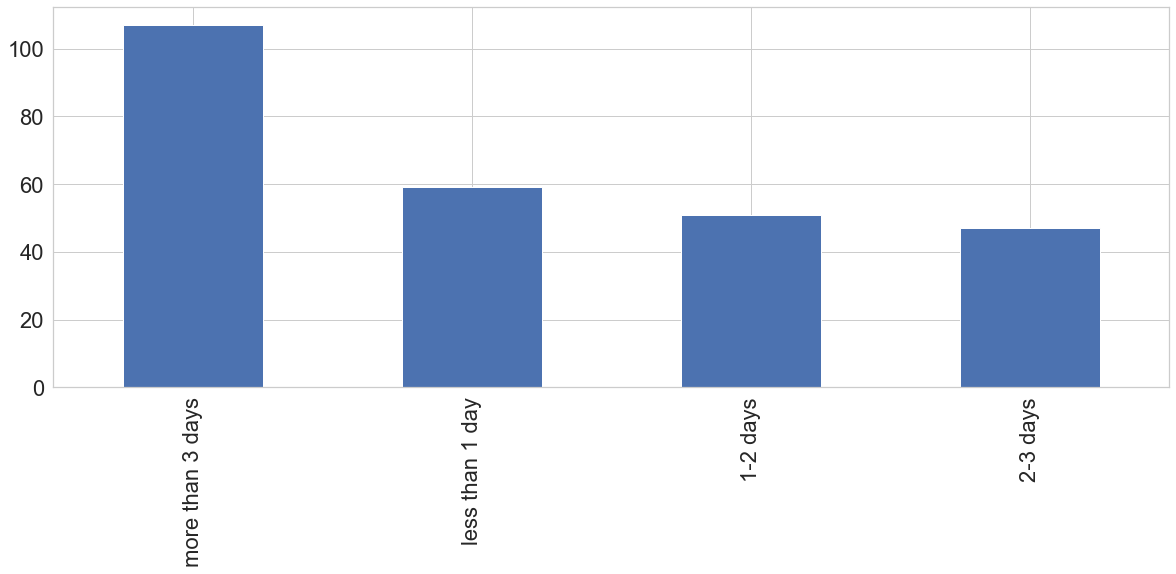

In [267]:
df['delay_categorical'].value_counts().plot(kind = 'bar')

The most common case when deals are delayed - more than 3 days

Task4 Show on a graph the changes in price for 'organic' avocados in Chicago and Pittsburgh(use seaborn or plotly)

In [268]:
avocado_full.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [269]:
avocado_full['Date']=pd.to_datetime(avocado_full['Date'])

In [270]:
regions = ['Chicago','Pittsburgh']

In [282]:
average_price = avocado_full[(avocado_full['type']== 'organic')&(avocado_full['region'].isin(regions))]\
.groupby(['Date', 'region']).agg({'AveragePrice':'mean'}).reset_index()
                  

In [283]:
average_price

,Date,region,AveragePrice
0,2015-01-04,Chicago,1.49
1,2015-01-04,Pittsburgh,1.81
2,2015-01-11,Chicago,1.79
3,2015-01-11,Pittsburgh,1.82
4,2015-01-18,Chicago,1.81
...,...,...,...
333,2018-03-11,Pittsburgh,1.41
334,2018-03-18,Chicago,1.66
335,2018-03-18,Pittsburgh,1.36
336,2018-03-25,Chicago,1.69


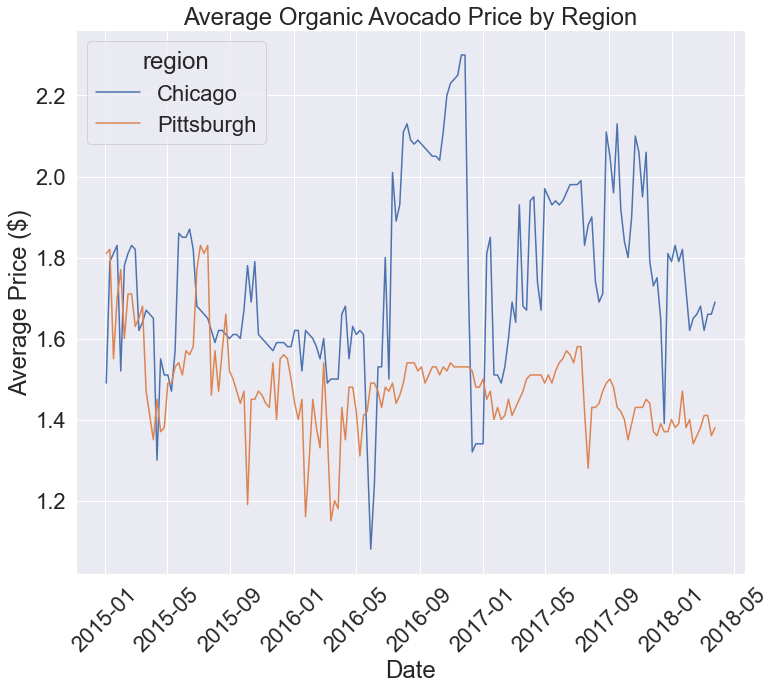

In [284]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.lineplot(x='Date', y='AveragePrice', hue='region', data=average_price)
plt.xticks(rotation=45)
plt.title('Average Organic Avocado Price by Region')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.show()

In [285]:

fig = px.line(average_price, x='Date', y='AveragePrice', color='region', title='Average Organic Avocado Prices by Region')
fig.show()

This graph shows that the price of organic avocados is generally lower in Pittsburgh than in Chicago.
However, there were periods (04/12/2015, 06/29/2016, 12/11/2016-01/01/2017) when the price of avocados in Chicago was lower than in Pittsburgh.